### Training MLP-models

Linn Alexandra Emhjellen, 2021. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

from sklearn.metrics import recall_score,roc_curve,auc
from pandas.plotting import scatter_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import seaborn as sns

### Loading calibration set

In [3]:
train_X = pd.read_excel('ML_training_features.xlsx')
train_y = pd.read_excel('ML_training_target.xlsx')

### Loading validation set

In [4]:
validation_X = pd.read_excel('ML_validation_features.xlsx')
validation_y = pd.read_excel('ML_validation_target.xlsx')

In [5]:
validation_y = validation_y['ReleaseArea']
train_y = train_y['ReleaseArea']

#### The optimized hyperparameters from RandomSearch with cross-validation

In [6]:
best_params_MLP = pd.read_excel('MLP_best_params_RandomSearch.xlsx')
best_params_MLP = best_params_MLP.drop(columns = 'Unnamed: 0')
best_param_grid = best_params_MLP.to_dict(orient = 'records')

#### Defining feature combinations

In [7]:
# feature combinations
p1 = ['Slope']

p2 = ['Slope','Elevation']

p3 = ['Slope','North','East','North East','North West','South','South East','South West','West']

p4 = ['Slope','Elevation','Plan_curv','Profile_curv','TRI','Distance_to_roads']

p5 = ['Slope','Elevation','Plan_curv','Profile_curv','TRI','Flow_dir','Flow_acc','Distance_to_roads']

p6 = ['Slope','Elevation','Plan_curv','Profile_curv','TRI']

p7 = ['Elevation','North','East','North East','North West','South','South East','South West','West','Plan_curv','Profile_curv','TRI','Flow_dir','Flow_acc','Distance_to_roads']

p8 = ['Slope','Elevation','North','East','North East','North West','South','South East','South West','West','Plan_curv','Profile_curv','TRI','Flow_dir','Flow_acc','Distance_to_roads',
      'Granite','Granodiorite','Tonalite','Trondhjemite','Syenite','Monzonite','Monzodiorite','Quartz diorite','Diorite','Gabbro','Norite','Peridotite','Pyroksenite','Charnockite','Mangerite','Anorthosite','Mafic dyke (Diabase, Dolerite)','Pegmatite/aplite','Felsic volcanic rock','Rhyolite','Dacite','Intermediate volcanic rock','Andesite','Mafic volcanic rock','Basalt',
                  'Pyroclastic rock','Volcanic breccia','Siltstone','Sandstone','Greywacke','Arkose','Konglomerate','Sedimentary breccia','Limestone','Tuffite','Shale','Phyllite','Mica schist','Garnet mica schist','Calcareous phyllite','Calcareous mica schist','Amphibole schist','Graphitic schist','Calcite marble',
                 'Metasandstone','Metagreywacke','Meta-arkose','Quartzite','Quartz schist','Mica gneiss','Calc-silicate rock','Amphibole gneiss','Granitic gneiss','Granodioritic gneiss','Tonalitic gneiss','Quartz dioritic gneiss','Monzonitic gneiss','Dioritic gneis','Orthopyroxene gneiss','Migmatite','Augengneiss',
                    'Banded gneiss','Greenschist','Greenstone','Amphibolite','Metagabbro','Eclogite','Serpentinite','Mylonite/Phyllonite','Cataclasite']

feature_combinations = [p1,p2,p3,p4,p5,p6,p7,p8]

### Training of models

In [ ]:
clf_mlp_models = []
pred_release_training_MLP = []
pred_release_testing_MLP = []
pred_release_prob_MLP = []

confusion_matrixes_training = []
confusion_matrixes_test = []
#feature_importances = []

f1_scores = []
ROC_curves = []
CV_scores = []
R2_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
roc_auc_scores = []



n = 0
for i in feature_combinations:
    
    X_train = train_X[i]
    X_test = validation_X[i]

    AUTO_SCALING = True
    if AUTO_SCALING:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_training = scaler.transform(X_train)
        X_testing = scaler.transform(X_test)
       
    #nnetwork = MLPClassifier(max_iter=1000)    
   
    clf_mlp = MLPClassifier(solver = best_param_grid[n]["solver"], hidden_layer_sizes = best_param_grid[n]["hidden_layer_sizes"], alpha = best_param_grid[n]["alpha"], max_iter=200,verbose=3)
    clf_mlp.fit(X_training, train_y)
    clf_mlp_models.append(clf_mlp)
    
    pred_release_at_training_MLP = clf_mlp.predict(X_training)
    pred_release_training_MLP.append(pred_release_at_training_MLP)
    
    pred_prob_MLP = clf_mlp.predict_proba(X_testing)
    pred_release_prob_MLP.append(pred_prob_MLP)
    
    pred_release_at_validation_MLP = clf_mlp.predict(X_testing)
    pred_release_testing_MLP.append(pred_release_at_validation_MLP)
    
    c_m = confusion_matrix(train_y,pred_release_at_training_MLP)
    confusion_matrixes_training.append(c_m)
    
    c_m_v = confusion_matrix(validation_y,pred_release_at_validation_MLP)
    confusion_matrixes_test.append(c_m_v)
    
    f1 = f1_score(validation_y, pred_release_at_validation_MLP, average='macro')
    f1_scores.append(f1)
    
    CV = cross_val_score(estimator= clf_mlp, X=X_training, y=train_y)
    CV_scores.append(CV)
    
    CLF_ROC = plot_roc_curve(clf_mlp, X_testing, validation_y, color = 'r')
    ROC_curves.append(CLF_ROC)
    plt.close()
    
    r2 = r2_score(validation_y, pred_release_at_validation_MLP)
    R2_scores.append(r2)
    
    acc = accuracy_score(validation_y, pred_release_at_validation_MLP)
    accuracy_scores.append(acc)
    
    precision = precision_score(validation_y, pred_release_at_validation_MLP)
    precision_scores.append(precision)
    
    recall = recall_score(validation_y, pred_release_at_validation_MLP)
    recall_scores.append(recall)
    
    roc_auc = roc_auc_score(validation_y, pred_release_at_validation_MLP)
    roc_auc_scores.append(roc_auc)
    
    n += 1

Iteration 1, loss = 0.49329313
Iteration 2, loss = 0.25705141
Iteration 3, loss = 0.18584060
Iteration 4, loss = 0.16627930
Iteration 5, loss = 0.16033727
Iteration 6, loss = 0.15839359
Iteration 7, loss = 0.15758800
Iteration 8, loss = 0.15718740
Iteration 9, loss = 0.15686088
Iteration 10, loss = 0.15666376
Iteration 11, loss = 0.15652130
Iteration 12, loss = 0.15639366
Iteration 13, loss = 0.15629016
Iteration 14, loss = 0.15629755
Iteration 15, loss = 0.15615804
Iteration 16, loss = 0.15619507
Iteration 17, loss = 0.15616823
Iteration 18, loss = 0.15612967
Iteration 19, loss = 0.15618076
Iteration 20, loss = 0.15615905
Iteration 21, loss = 0.15602008
Iteration 22, loss = 0.15617861
Iteration 23, loss = 0.15607845
Iteration 24, loss = 0.15613335
Iteration 25, loss = 0.15618914
Iteration 26, loss = 0.15611393
Iteration 27, loss = 0.15606942
Iteration 28, loss = 0.15602103
Iteration 29, loss = 0.15609924
Iteration 30, loss = 0.15611314
Iteration 31, loss = 0.15608958
Iteration 32, los

C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATION

Iteration 1, loss = 0.48892907
Iteration 2, loss = 0.25166553
Iteration 3, loss = 0.20244590
Iteration 4, loss = 0.18799445
Iteration 5, loss = 0.18136986
Iteration 6, loss = 0.17754311
Iteration 7, loss = 0.17484031
Iteration 8, loss = 0.17321192
Iteration 9, loss = 0.17226888
Iteration 10, loss = 0.17119937
Iteration 11, loss = 0.17055765
Iteration 12, loss = 0.17006394
Iteration 13, loss = 0.16953533
Iteration 14, loss = 0.16930679
Iteration 15, loss = 0.16900752
Iteration 16, loss = 0.16901378
Iteration 17, loss = 0.16877523
Iteration 18, loss = 0.16883850
Iteration 19, loss = 0.16863304
Iteration 20, loss = 0.16852365
Iteration 21, loss = 0.16863493
Iteration 22, loss = 0.16836198
Iteration 23, loss = 0.16844024
Iteration 24, loss = 0.16832229
Iteration 25, loss = 0.16826388
Iteration 26, loss = 0.16828224
Iteration 27, loss = 0.16816954
Iteration 28, loss = 0.16823874
Iteration 29, loss = 0.16823795
Iteration 30, loss = 0.16802659
Iteration 31, loss = 0.16816288
Iteration 32, los

Iteration 19, loss = 0.17211451
Iteration 20, loss = 0.17177975
Iteration 21, loss = 0.17190084
Iteration 22, loss = 0.17168785
Iteration 23, loss = 0.17158649
Iteration 24, loss = 0.17164491
Iteration 25, loss = 0.17143937
Iteration 26, loss = 0.17148690
Iteration 27, loss = 0.17157937
Iteration 28, loss = 0.17126049
Iteration 29, loss = 0.17128867
Iteration 30, loss = 0.17128537
Iteration 31, loss = 0.17120853
Iteration 32, loss = 0.17125408
Iteration 33, loss = 0.17126612
Iteration 34, loss = 0.17104033
Iteration 35, loss = 0.17128975
Iteration 36, loss = 0.17105420
Iteration 37, loss = 0.17100883
Iteration 38, loss = 0.17103718
Iteration 39, loss = 0.17107349
Iteration 40, loss = 0.17110511
Iteration 41, loss = 0.17100747
Iteration 42, loss = 0.17124864
Iteration 43, loss = 0.17091055
Iteration 44, loss = 0.17116297
Iteration 45, loss = 0.17099877
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.40897591
Iteration 2, lo

C:\Users\LEm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.43356551
Iteration 2, loss = 0.23849093
Iteration 3, loss = 0.17866213
Iteration 4, loss = 0.15609459
Iteration 5, loss = 0.14613023
Iteration 6, loss = 0.14082568
Iteration 7, loss = 0.13746849
Iteration 8, loss = 0.13516803
Iteration 9, loss = 0.13347502
Iteration 10, loss = 0.13197186
Iteration 11, loss = 0.13087770
Iteration 12, loss = 0.12977505
Iteration 13, loss = 0.12873746
Iteration 14, loss = 0.12810431
Iteration 15, loss = 0.12716588
Iteration 16, loss = 0.12635059
Iteration 17, loss = 0.12572446
Iteration 18, loss = 0.12501772
Iteration 19, loss = 0.12452491
Iteration 20, loss = 0.12384954
Iteration 21, loss = 0.12320323
Iteration 22, loss = 0.12283299
Iteration 23, loss = 0.12246799
Iteration 24, loss = 0.12175186
Iteration 25, loss = 0.12144506


### Save final models and metrics

In [13]:
# save models
joblib.dump(clf_mlp_models[0], "MLP_p1_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[1], "MLP_p2_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[2], "MLP_p3_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[3], "MLP_p4_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[4], "MLP_p5_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[5], "MLP_p6_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[6], "MLP_p7_Emhjellen2.joblib",compress=3)
joblib.dump(clf_mlp_models[7], "MLP_p8_Emhjellen2.joblib",compress=3)

# ../saved_models/RF_p6_Emhjellen2.joblib",compress=3)

['MLP_p8_Emhjellen2.joblib']

In [16]:
# plot of confusion matrixes from training
n = 0;
for i in confusion_matrixes_training:
    n += 1
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                i.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     i.flatten()/np.sum(i)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure()
    plot = sns.heatmap(i, annot=labels, fmt='', cmap='Blues')
    plt.savefig('saved_figures_2/confusion_matrix_MLP_feature_combination_training'+ 'p'+ str(n) +'.png')
    plt.close()

In [17]:
# plot of confusion matrixes from test
n = 0;
for i in confusion_matrixes_test:
    n += 1
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                i.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     i.flatten()/np.sum(i)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure()
    plot = sns.heatmap(i, annot=labels, fmt='', cmap='Blues')
    plt.savefig('saved_figures_2/confusion_matrix_MLP_feature_combination_validation'+ 'p'+ str(n) +'.png')
    plt.close()
    
    #plt.savefig('saved_figures/confusion_matrix_RF_feature_combination_validation'+ 'p'+ str(n) +'.png')

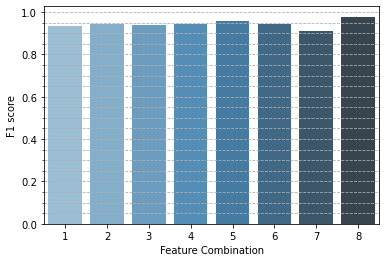

In [19]:
# bar plot of f1 scores

fig = sns.barplot(x=np.arange(1,9), y=f1_scores,palette="Blues_d")
    
plt.xlabel('Feature Combination')
plt.ylabel('F1 score')
plt.title("")
ticks = np.arange(0, 1, 0.05)
fig.set_yticks(ticks, minor=True)
fig.grid(which='both',axis='y',linestyle='dashed')
plt.rc('axes', axisbelow=True)
plt.savefig('saved_figures_2/f1_scores_MLP.png')
#plt.close()

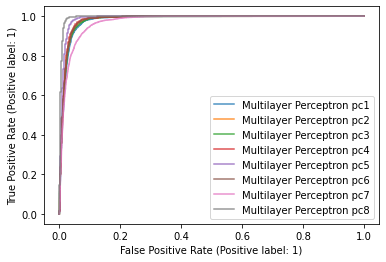

In [26]:
# plot of ROC curves

ax = plt.gca()
n = 0
for i in ROC_curves:
    n += 1
    i.plot(ax=ax, alpha=0.8, label = 'Multilayer Perceptron '+ 'pc'+ str(n))
plt.savefig('saved_figures_2/ROC_curve_feature_combinations_MLP_2.png')   

In [21]:
cv_scores_RF = pd.DataFrame(CV_scores)
cv_scores_RF.to_excel('MLP_CV_scores_training2.xlsx')

In [22]:
f1_scores_RF = pd.DataFrame(f1_scores)
f1_scores_RF.to_excel('MLP_F1_scores2.xlsx')

In [23]:
accuracy_scores_RF = pd.DataFrame(accuracy_scores)
accuracy_scores_RF.to_excel('MLP_accuracy_scores2.xlsx')

In [24]:
precision_scores_RF = pd.DataFrame(precision_scores)
precision_scores_RF.to_excel('MLP_precision_scores2.xlsx')

In [25]:
recall_scores_RF = pd.DataFrame(recall_scores)
recall_scores_RF.to_excel('MLP_recall_scores2.xlsx')

In [26]:
R2_scores_RF = pd.DataFrame(R2_scores)
R2_scores_RF.to_excel('MLP_R2_scores2.xlsx')

In [ ]:
roc_auc_scores = pd.DataFrame(roc_auc_scores)
roc_auc_scores.to_excel('MLP_roc_auc_scores.xlsx')

## Prediction results


In [30]:
validation_y = pd.read_excel('ML_validation_target.xlsx')

df_coor = validation_y[['POINT_X', 'POINT_Y']]

In [32]:
# extracting the values that are probability for rockfall, class 1

df_coor['MLP_prob_p1'] = pred_release_prob_MLP[0][:,1]
df_coor['MLP_prob_p2'] = pred_release_prob_MLP[1][:,1]
df_coor['MLP_prob_p3'] = pred_release_prob_MLP[2][:,1]
df_coor['MLP_prob_p4'] = pred_release_prob_MLP[3][:,1]
df_coor['MLP_prob_p5'] = pred_release_prob_MLP[4][:,1]
df_coor['MLP_prob_p6'] = pred_release_prob_MLP[5][:,1]
df_coor['MLP_prob_p7'] = pred_release_prob_MLP[6][:,1]
df_coor['MLP_prob_p8'] = pred_release_prob_MLP[7][:,1]

<ipython-input-32-361dda0d81ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coor['MLP_prob_p1'] = pred_release_prob_MLP[0][:,1]


In [33]:
df_coor['MLP_prediction_p1'] = pred_release_testing_MLP[0]
df_coor['MLP_prediction_p2'] = pred_release_testing_MLP[1]
df_coor['MLP_prediction_p3'] = pred_release_testing_MLP[2]
df_coor['MLP_prediction_p4'] = pred_release_testing_MLP[3]
df_coor['MLP_prediction_p5'] = pred_release_testing_MLP[4]
df_coor['MLP_prediction_p6'] = pred_release_testing_MLP[5]
df_coor['MLP_prediction_p7'] = pred_release_testing_MLP[6]
df_coor['MLP_prediction_p8'] = pred_release_testing_MLP[7]

In [37]:
df_coor['ReleaseArea'] = validation_y['ReleaseArea'] 

In [38]:
result1 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p1'].iloc[row] == 1:
        result1.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p1'].iloc[row] == 0:
        result1.append('TN')
    elif df_coor['MLP_prediction_p1'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result1.append('FP')
    elif df_coor['MLP_prediction_p1'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result1.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p1'] = result1

In [39]:
result2 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p2'].iloc[row] == 1:
        result2.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p2'].iloc[row] == 0:
        result2.append('TN')
    elif df_coor['MLP_prediction_p2'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result2.append('FP')
    elif df_coor['MLP_prediction_p2'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result2.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p2'] = result2

In [40]:
result3 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p3'].iloc[row] == 1:
        result3.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p3'].iloc[row] == 0:
        result3.append('TN')
    elif df_coor['MLP_prediction_p3'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result3.append('FP')
    elif df_coor['MLP_prediction_p3'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result3.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p3'] = result3

In [41]:
result4 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p4'].iloc[row] == 1:
        result4.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p4'].iloc[row] == 0:
        result4.append('TN')
    elif df_coor['MLP_prediction_p4'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result4.append('FP')
    elif df_coor['MLP_prediction_p4'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result4.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p4'] = result4

In [42]:
result5 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p5'].iloc[row] == 1:
        result5.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p5'].iloc[row] == 0:
        result5.append('TN')
    elif df_coor['MLP_prediction_p5'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result5.append('FP')
    elif df_coor['MLP_prediction_p5'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result5.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p5'] = result5

In [43]:
result6 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p6'].iloc[row] == 1:
        result6.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p6'].iloc[row] == 0:
        result6.append('TN')
    elif df_coor['MLP_prediction_p6'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result6.append('FP')
    elif df_coor['MLP_prediction_p6'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result6.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p6'] = result6

In [44]:
result7 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p7'].iloc[row] == 1:
        result7.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p7'].iloc[row] == 0:
        result7.append('TN')
    elif df_coor['MLP_prediction_p7'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result7.append('FP')
    elif df_coor['MLP_prediction_p7'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result7.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p7'] = result7

In [45]:
result8 = []
for row in range(0,len(df_coor)):
    if df_coor['ReleaseArea'].iloc[row] == 1 and df_coor['MLP_prediction_p8'].iloc[row] == 1:
        result8.append('TP')
    elif df_coor['ReleaseArea'].iloc[row] == 0 and df_coor['MLP_prediction_p8'].iloc[row] == 0:
        result8.append('TN')
    elif df_coor['MLP_prediction_p8'].iloc[row] == 1 and df_coor['ReleaseArea'].iloc[row] == 0:
        result8.append('FP')
    elif df_coor['MLP_prediction_p8'].iloc[row] == 0 and df_coor['ReleaseArea'].iloc[row] == 1:
        result8.append('FN')
    else:
        print('NaN')
        
        
df_coor['result_p8'] = result8

In [46]:
df_coor.to_excel('prediction_results_validation_MLP2.xlsx')